# Question

# Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps







In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = (150)
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yashvardhanpatil/Assignment-Dataset/main/KNN/glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df['Type'].nunique()

6

# Model Buliding

In [7]:
x = df.iloc[:,:-1]
y = df['Type']

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
yp = knn.predict(xtest)

In [10]:
yp

array([6, 7, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 7,
       2, 1, 1, 1, 2, 2, 2, 1, 5, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 7, 7],
      dtype=int64)

In [11]:
knn.score(xtrain,ytrain),knn.score(xtest,ytest)


(0.8187134502923976, 0.6976744186046512)

In [12]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

           1       0.67      0.84      0.74        19
           2       0.69      0.75      0.72        12
           3       0.00      0.00      0.00         6
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         4

    accuracy                           0.70        43
   macro avg       0.56      0.60      0.58        43
weighted avg       0.60      0.70      0.65        43



In [13]:
trainAccuracy = []
testAccuracy = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    trainAccuracy.append(knn.score(xtrain,ytrain))
    testAccuracy.append(knn.score(xtest,ytest))

In [14]:
data = pd.DataFrame({'TrainAccuracy':trainAccuracy,'TestAccuracy':testAccuracy})

In [15]:
data

,TrainAccuracy,TestAccuracy
0,1.000000,0.720930
1,0.836257,0.697674
2,0.818713,0.697674
3,0.783626,0.697674
4,0.748538,0.720930
5,0.742690,0.674419
6,0.701754,0.697674
7,0.690058,0.651163
8,0.643275,0.604651
9,0.643275,0.604651


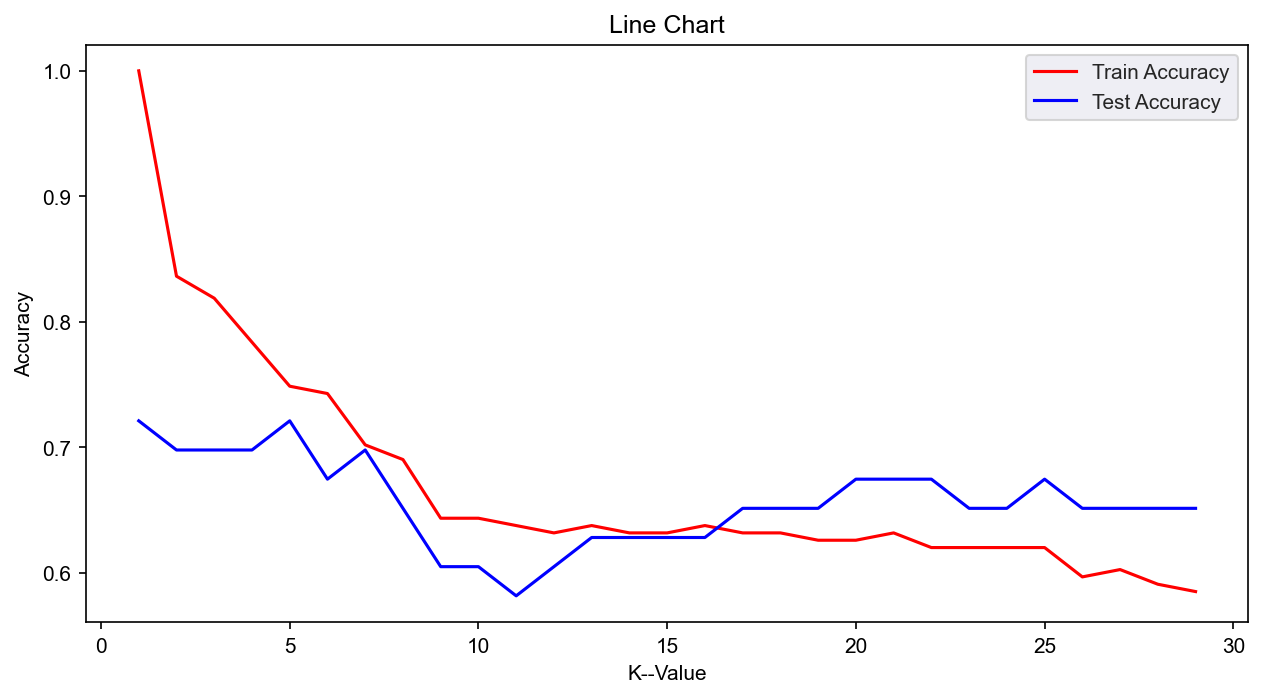

In [16]:
plt.plot(range(1,30),trainAccuracy,color = 'red',label = 'Train Accuracy')
plt.plot(range(1,30),testAccuracy,color = 'blue',label = 'Test Accuracy')
plt.xlabel('K--Value')
plt.ylabel('Accuracy')
plt.title('Line Chart')
sns.set_style('darkgrid')
plt.legend()

In [17]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain),knn.score(xtest,ytest)


(0.7017543859649122, 0.6976744186046512)

# Here this is generalize mode but accuracy is less